# 6. Construyendo tu Primera Red Neuronal con Keras
En esta capítulo se guiará al lector a través del proceso de construcción de su primera red neuronal utilizando la biblioteca Keras. Se explicará cómo cargar y preprocesar conjuntos de datos, construir una arquitectura de red neuronal básica, compilar el modelo y ajustar los datos. Se utilizará el ejemplo de reconocimiento de dígitos utilizando el conjunto de datos FASHION_MNIST.

## 6.1. Carga y preprocesamiento de conjuntos de datos

El primer paso para construir una red neuronal es obtener los datos con los que entrenaremos a nuestro modelo. En este caso, utilizaremos el conjunto de datos llamado FASHION_MNIST, que contiene imágenes de distintos artículos de moda, como camisetas, pantalones y zapatillas, y es muy popular en el mundo del aprendizaje profundo.

### Conceptos clave

#### Conjunto de datos
Un conjunto de datos es una colección de datos que se utiliza para el entrenamiento, la validación y las pruebas de un modelo. Este conjunto de datos puede ser una mezcla de datos etiquetados y sin etiquetar, y suelen ser necesarios para el entrenamiento supervisado.

**Ejemplo:** Supongamos que estás aprendiendo a cocinar. Tus "datos" serían las recetas que sigues, y la "etiqueta" sería el plato resultante. Así, si tienes una foto del plato final y las instrucciones para cocinarlo, tienes una pieza de "datos etiquetados".

Para cargar y preprocesar los datos, utilizaremos el siguiente código:

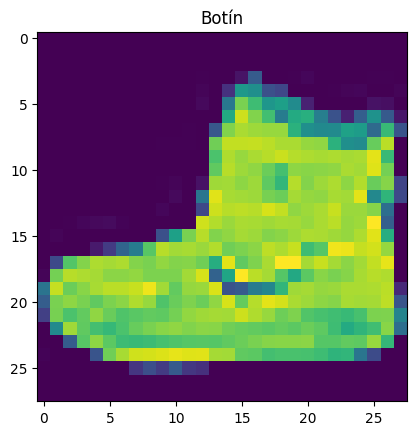

In [1]:
from keras.datasets import fashion_mnist

# Cargamos los datos de Fashion MNIST
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Lista de categorías en el conjunto de datos Fashion MNIST
fashion_mnist_labels = ["Camiseta/top",  # index 0
                        "Pantalón",      # index 1
                        "Suéter",        # index 2
                        "Vestido",       # index 3 
                        "Abrigo",        # index 4
                        "Sandalia",      # index 5
                        "Camisa",        # index 6 
                        "Zapatilla",     # index 7
                        "Bolso",         # index 8 
                        "Botín"]         # index 9

import matplotlib.pyplot as plt

# Muestra la primera imagen en los datos de entrenamiento
plt.imshow(train_data[0])
plt.title(fashion_mnist_labels[train_labels[0]])
plt.show()

## 6.2. Construcción de una arquitectura de red neuronal básica

El siguiente paso es definir la arquitectura de nuestra red neuronal. Esta arquitectura es una forma de organizar las neuronas y sus conexiones.

### Conceptos clave

#### Red Neuronal Artificial
Una Red Neuronal Artificial (RNA) es un modelo de aprendizaje automático inspirado en las redes neuronales biológicas. Compuesta por una serie de "neuronas artificiales" o nodos, estas redes "aprenden" a realizar tareas al considerar ejemplos, generalmente sin estar programadas con reglas específicas para la tarea.

**Ejemplo:** Imagina que estás enseñando a un niño a reconocer animales. No le das todas las características que hacen a un perro, un perro. En lugar de eso, le muestras muchas imágenes de perros y le dices: "esto es un perro". Con suficientes ejemplos, el niño aprenderá a reconocer los perros incluso si no puede articular las reglas específicas que definen a un perro.

Para construir nuestra red neuronal, utilizaremos el siguiente código:

In [2]:
from keras import models, layers

# Definimos la arquitectura de la red neuronal
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

## 6.3. Ajuste de datos y entrenamiento del modelo

Ahora que tenemos nuestros datos y hemos definido nuestra red, el siguiente paso es ajustar los datos de entrada y entrenar el modelo. En este paso, aprenderás a normalizar los datos para mejorar el rendimiento del modelo y cómo entrenar el modelo utilizando los datos de entrenamiento. También exploraremos cómo ajustar los hiperparámetros para optimizar el proceso de entrenamiento.

### Conceptos clave

#### Ajuste de datos
El ajuste de datos es el proceso de preparar los datos de entrada para el modelo. Esto puede incluir la normalización de los datos, la codificación de las etiquetas, la división de los datos en conjuntos de entrenamiento y prueba, entre otros.

**Ejemplo:** Volviendo al ejemplo de aprender a cocinar, ajustar los datos sería como preparar tus ingredientes antes de comenzar a cocinar. Esto podría incluir lavar las verduras, cortar los ingredientes en el tamaño correcto, etc.

Para ajustar nuestros datos, utilizaremos el siguiente código:

In [3]:
# Revisamos la forma inicial de los datos
print('Forma de los datos de entrenamiento antes del preprocesamiento:', train_data.shape)

# Cambiamos la forma de los datos para que puedan ser introducidos en nuestra red neuronal
train_data = train_data.reshape([60000, 28*28])
test_data = test_data.reshape([10000, 28*28])

print('Forma de los datos de entrenamiento después del preprocesamiento:', train_data.shape)

# Normalizamos los datos de entrada
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# Codificamos nuestras etiquetas de categoría en vectores binarios
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Forma de los datos de entrenamiento antes del preprocesamiento: (60000, 28, 28)
Forma de los datos de entrenamiento después del preprocesamiento: (60000, 784)


## 7. Entrenando y Evaluando el Modelo de tu Red Neuronal
En este capítulo se enseñará cómo entrenar y evaluar el modelo de una red neuronal utilizando los datos de entrenamiento y prueba. Se explicará cómo ajustar los datos de entrada, entrenar el modelo con los datos de entrenamiento, y evaluar la precisión del modelo utilizando los datos de prueba.

## 7.1. Entrenamiento del modelo con los datos de entrenamiento

El entrenamiento es donde alimentamos nuestros datos de entrenamiento al modelo. En este proceso, el modelo intenta aprender patrones útiles en los datos de entrenamiento que le permitirán realizar la tarea en cuestión, como la clasificación de imágenes.

### Conceptos clave

#### Función de pérdida y Optimizador
La función de pérdida es una forma de medir cuán bien se desempeña el modelo en los datos de entrenamiento. Deseamos minimizar esta función para "guiar" el modelo en la dirección correcta.

El optimizador es el algoritmo que utilizamos para minimizar la función de pérdida. Este algoritmo realiza pequeños ajustes a los pesos y sesgos de la red para mejorar su rendimiento.

**Ejemplo:** Puedes imaginar el entrenamiento del modelo como el proceso de aprender a lanzar dardos. Al principio, tus lanzamientos pueden no acertar en el objetivo (alta función de pérdida). Sin embargo, con práctica y ajuste, puedes mejorar tu puntería (minimizar la función de pérdida con un optimizador).

Ahora, procedamos a entrenar nuestro modelo utilizando el siguiente código:

In [4]:
# Definimos el optimizador, la función de pérdida y las métricas que queremos rastrear
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(train_data, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 20ms/step - loss: 0.5584 - accuracy: 0.8011
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3843 - accuracy: 0.8590
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3395 - accuracy: 0.8752
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3123 - accuracy: 0.8852
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2932 - accuracy: 0.8913


## 7.2. Evaluación de la precisión del modelo con los datos de prueba

Después de entrenar nuestro modelo, queremos evaluar qué tan bien se desempeña en datos que nunca ha visto antes, a esto lo llamamos datos de prueba. 

### Conceptos clave

#### Evaluación y Precisión
La evaluación es el proceso de verificar qué tan bien se desempeña nuestro modelo en datos que no se utilizaron durante el entrenamiento. La precisión es una medida de cuántas predicciones realizó correctamente el modelo.

**Ejemplo:** Volviendo al ejemplo de lanzar dardos, la evaluación sería como participar en un torneo de dardos después de practicar. Tu puntuación en el torneo (precisión) es una medida de qué tan bien has aprendido a lanzar dardos.

Podemos evaluar la precisión de nuestro modelo con el siguiente código:

In [5]:
# Evaluamos el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8767
Test accuracy: 0.8766999840736389
